<a href="https://colab.research.google.com/github/anarghyakinila88/ML-Internship/blob/main/Tweet_Emotion_Recognition_using_TensorFlow.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install nlp

     |████████████████████████████████| 1.7 MB 34.9 MB/s 
     |████████████████████████████████| 243 kB 60.0 MB/s 


Task 1: Introduction

Task 2: Setup and Imports

1.Installing Hugging Face's nlp package

2.Importing libraries

In [3]:
%matplotlib inline

import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import nlp
import random


def show_history(h):
    epochs_trained = len(h.history['loss'])
    plt.figure(figsize=(16, 6))

    plt.subplot(1, 2, 1)
    plt.plot(range(0, epochs_trained), h.history.get('accuracy'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_accuracy'), label='Validation')
    plt.ylim([0., 1.])
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(range(0, epochs_trained), h.history.get('loss'), label='Training')
    plt.plot(range(0, epochs_trained), h.history.get('val_loss'), label='Validation')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()

    
def show_confusion_matrix(y_true, y_pred, classes):
    from sklearn.metrics import confusion_matrix
    
    cm = confusion_matrix(y_true, y_pred, normalize='true')

    plt.figure(figsize=(8, 8))
    sp = plt.subplot(1, 1, 1)
    ctx = sp.matshow(cm)
    plt.xticks(list(range(0, 6)), labels=classes)
    plt.yticks(list(range(0, 6)), labels=classes)
    plt.colorbar(ctx)
    plt.show()

    
print('Using TensorFlow version', tf.__version__)

Using TensorFlow version 2.7.0


Task 3: Importing Data

1.Importing the Tweet Emotion dataset

2.Creating train, validation and test sets

3.Extracting tweets and labels from the examples

In [4]:
dataset=nlp.load_dataset('emotion')

Downloading:   0%|          | 0.00/3.41k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/6.01k [00:00<?, ?B/s]

Using custom data configuration default


Downloading:   0%|          | 0.00/1.66M [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/204k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/207k [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

0 examples [00:00, ? examples/s]

Dataset emotion downloaded and prepared to /root/.cache/huggingface/datasets/emotion/default/0.0.0/84e07cd366f4451464584cdbd4958f512bcaddb1e921341e07298ce8a9ce42f4. Subsequent calls will reuse this data.


In [5]:
dataset

{'test': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000),
 'train': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 16000),
 'validation': Dataset(features: {'text': Value(dtype='string', id=None), 'label': Value(dtype='string', id=None)}, num_rows: 2000)}

In [6]:
train=dataset['train']
val=dataset['validation']
test=dataset['test']


In [7]:
def get_tweet(data):
  tweets=[x['text'] for x in data]
  labels=[x['label'] for x in data]
  return tweets,labels

In [8]:
tweets,labels=get_tweet(train)

In [9]:
tweets[0],labels[0]

('i didnt feel humiliated', 'sadness')

Task 4: Tokenizer

Tokenizing the tweets

In [10]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [11]:
tokenizer = Tokenizer(num_words=10000,oov_token='<UNK>')
tokenizer.fit_on_texts(tweets)


In [12]:
tokenizer.texts_to_sequences([tweets[0]])

[[2, 139, 3, 679]]

In [13]:
tweets[0]

'i didnt feel humiliated'

Task 5: Padding and Truncating Sequences

1.Checking length of the tweets

2.Creating padded sequences

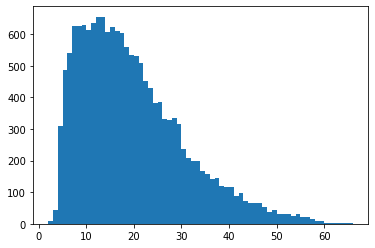

In [15]:
lengths=[len(t.split(' ')) for t in tweets]
plt.hist(lengths, bins=len(set(lengths)))
plt.show()


In [20]:
maxlen=50

from tensorflow.keras.preprocessing.sequence import pad_sequences

In [21]:
def get_sequences(tokenizer,tweets):
  sequences = tokenizer.texts_to_sequences(tweets)
  padded=pad_sequences(sequences, truncating='post',padding='post',maxlen=maxlen)
  return padded

In [24]:
padded_train_seq = get_sequences(tokenizer,tweets)

In [25]:
padded_train_seq[0]

array([  2, 139,   3, 679,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0], dtype=int32)

Task 6: Preparing the Labels

1.Creating classes to index and index to classes dictionaries

2.Converting text labels to numeric labels

In [26]:
classes = set(labels)
print(classes)

{'joy', 'surprise', 'fear', 'love', 'anger', 'sadness'}


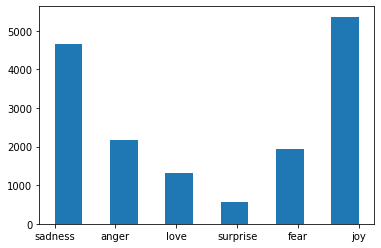

In [27]:
plt.hist(labels,bins=11)
plt.show()

In [66]:
class_to_index = dict((c,i) for i,c in enumerate(classes))
index_to_class = dict((v,k) for v,k in class_to_index.items())

In [29]:
class_to_index

{'anger': 4, 'fear': 2, 'joy': 0, 'love': 3, 'sadness': 5, 'surprise': 1}

In [30]:
index_to_class

{'anger': 4, 'fear': 2, 'joy': 0, 'love': 3, 'sadness': 5, 'surprise': 1}

Task 7: Creating the Model

1.Creating the model

2.Compiling the model

In [32]:
names_to_ids= lambda labels: np.array([class_to_index.get(x) for x in labels])

In [34]:
train_labels = names_to_ids(labels)
print(train_labels[0])

5


Task 8: Training the Model

1.Preparing a validation set

2.Training the model

In [38]:
model=tf.keras.models.Sequential([tf.keras.layers.Embedding(10000,16,input_length=maxlen),
                        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20,return_sequences=True)),
                        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(20)),
                        tf.keras.layers.Dense(6,activation='softmax')])

model.compile(
    loss='sparse_categorical_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [39]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding_2 (Embedding)     (None, 50, 16)            160000    
                                                                 
 bidirectional_4 (Bidirectio  (None, 50, 40)           5920      
 nal)                                                            
                                                                 
 bidirectional_5 (Bidirectio  (None, 40)               9760      
 nal)                                                            
                                                                 
 dense_2 (Dense)             (None, 6)                 246       
                                                                 
Total params: 175,926
Trainable params: 175,926
Non-trainable params: 0
_________________________________________________________________


In [41]:
val_tweets,val_labels = get_tweet(val)
val_seq=get_sequences(tokenizer,val_tweets)
val_labels=names_to_ids(val_labels)

In [42]:
val_tweets[0],val_labels[0]

('im feeling quite sad and sorry for myself but ill snap out of it soon', 5)

In [48]:
h=model.fit(padded_train_seq,train_labels,validation_data=(val_seq,val_labels), epochs=20,
            callbacks=[tf.keras.callbacks.EarlyStopping(monitor='val_accuracy',patience=2)]
            )

Epoch 1/20
500/500 [==============================] - 21s 42ms/step - loss: 0.0430 - accuracy: 0.9851 - val_loss: 0.4202 - val_accuracy: 0.8955
Epoch 2/20
500/500 [==============================] - 21s 42ms/step - loss: 0.0428 - accuracy: 0.9861 - val_loss: 0.4017 - val_accuracy: 0.8955
Epoch 3/20
500/500 [==============================] - 21s 42ms/step - loss: 0.0460 - accuracy: 0.9847 - val_loss: 0.4370 - val_accuracy: 0.8975
Epoch 4/20
500/500 [==============================] - 21s 42ms/step - loss: 0.0371 - accuracy: 0.9872 - val_loss: 0.4446 - val_accuracy: 0.8950
Epoch 5/20
500/500 [==============================] - 21s 42ms/step - loss: 0.0382 - accuracy: 0.9880 - val_loss: 0.4305 - val_accuracy: 0.8910


Task 9: Evaluating the Model

1.Visualizing training history

2.Prepraring a test set

3.A look at individual predictions on the test set

4.A look at all predictions on the test set

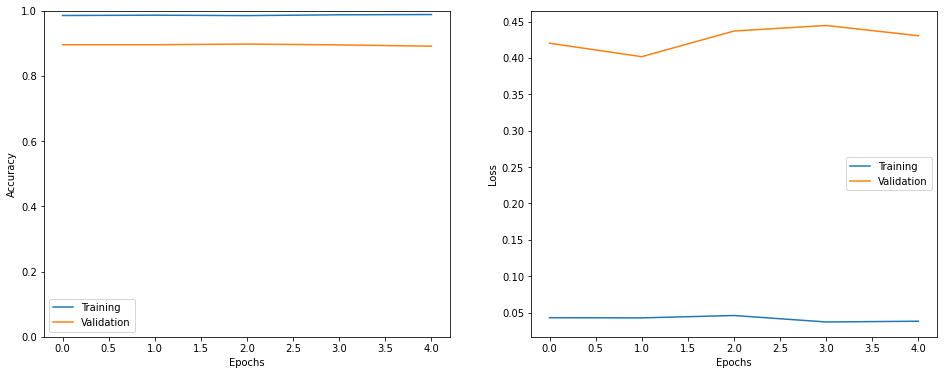

In [49]:
show_history(h)

In [54]:
test_tweets,test_labels=get_tweet(test)
test_seq = get_sequences(tokenizer,test_tweets)
test_labels=names_to_ids(test_labels)

In [56]:
_ = model.evaluate(test_seq,test_labels)

63/63 [==============================] - 1s 12ms/step - loss: 0.4348 - accuracy: 0.8935


In [71]:
i=random.randint(0,len(test_labels)-1)
print('Sentence:',test_tweets[i])
print('Emotion:',test_labels[i])

p=model.predict(np.expand_dims(test_seq[i],axis=0))[0]
pred_class=np.argmax(p).astype('uint8')

print('Predicted Emotion:',pred_class)

Sentence: i got home and told peter how i was feeling he wasnt shocked at all by what i was telling him
Emotion: 1
Predicted Emotion: 1


In [77]:
preds=model.predict(test_seq)